In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_csv("train.csv")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [ ]:
print(data.shape)
print(data.info())

In [ ]:
df.shape


In [ ]:
df.head()

In [ ]:
df.info()


In [1016]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1017]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

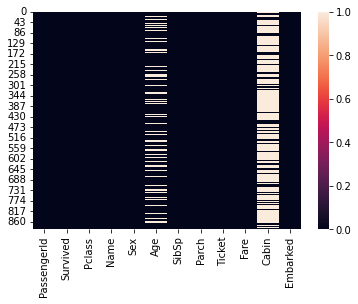

In [1018]:
import seaborn as sns
sns.heatmap(data.isnull())

In [1019]:
data.Age = data.Age.fillna(0)
data.Cabin = data.Cabin.fillna(0)
data.Embarked = data.Embarked.fillna(0)

In [1020]:
data = data.drop(columns = ['Name','PassengerId','Ticket','Cabin'])

In [1021]:
data['Sex'].replace( 'female', 0, inplace=True )
data['Sex'].replace( 'male', 1, inplace=True )
data['Embarked_S'] = data['Embarked'].replace('Q',0).replace('C',0).replace('S',1)
data['Embarked_Q'] = data['Embarked'].replace('C',0).replace('S',0).replace('Q',1)
data['Embarked_C'] = data['Embarked'].replace('S',0).replace('Q',0).replace('C',1)

In [1022]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_S,Embarked_Q,Embarked_C
0,0,3,1,22.0,1,0,7.2500,S,1,0,0
1,1,1,0,38.0,1,0,71.2833,C,0,0,1
2,1,3,0,26.0,0,0,7.9250,S,1,0,0
3,1,1,0,35.0,1,0,53.1000,S,1,0,0
4,0,3,1,35.0,0,0,8.0500,S,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,1,0,0
887,1,1,0,19.0,0,0,30.0000,S,1,0,0
888,0,3,0,0.0,1,2,23.4500,S,1,0,0
889,1,1,1,26.0,0,0,30.0000,C,0,0,1


In [1023]:
x = data.iloc[:,0:12]
y = data['Survived']

In [1024]:
x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_S,Embarked_Q,Embarked_C
0,0,3,1,22.0,1,0,7.2500,S,1,0,0
1,1,1,0,38.0,1,0,71.2833,C,0,0,1
2,1,3,0,26.0,0,0,7.9250,S,1,0,0
3,1,1,0,35.0,1,0,53.1000,S,1,0,0
4,0,3,1,35.0,0,0,8.0500,S,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,1,0,0
887,1,1,0,19.0,0,0,30.0000,S,1,0,0
888,0,3,0,0.0,1,2,23.4500,S,1,0,0
889,1,1,1,26.0,0,0,30.0000,C,0,0,1


In [1025]:
x = data.drop(columns = ['Survived','Embarked'])

In [1026]:
#x['Sex'].replace( 'female', 0, inplace=True )
#x['Sex'].replace( 'male', 1, inplace=True )
#x['Embarked_S'] = x['Embarked'].replace('Q',0).replace('C',0).replace('S',1)
#x['Embarked_Q'] = x['Embarked'].replace('C',0).replace('S',0).replace('Q',1)
#x['Embarked_C'] = x['Embarked'].replace('S',0).replace('Q',0).replace('C',1)

In [1027]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_Q,Embarked_C
0,3,1,22.0,1,0,7.2500,1,0,0
1,1,0,38.0,1,0,71.2833,0,0,1
2,3,0,26.0,0,0,7.9250,1,0,0
3,1,0,35.0,1,0,53.1000,1,0,0
4,3,1,35.0,0,0,8.0500,1,0,0
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,1,0,0
887,1,0,19.0,0,0,30.0000,1,0,0
888,3,0,0.0,1,2,23.4500,1,0,0
889,1,1,26.0,0,0,30.0000,0,0,1


In [1028]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [1029]:
#x.iloc[:,8].unique()

In [1030]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_Q,Embarked_C
0,3,1,22.0,1,0,7.2500,1,0,0
1,1,0,38.0,1,0,71.2833,0,0,1
2,3,0,26.0,0,0,7.9250,1,0,0
3,1,0,35.0,1,0,53.1000,1,0,0
4,3,1,35.0,0,0,8.0500,1,0,0


In [1031]:
num_cols=[0,1,4,3,6,7,8]
Kbin_cols = [5]
bina_cols = [2]

In [1032]:
from sklearn.preprocessing import StandardScaler,KBinsDiscretizer,Binarizer
from sklearn.compose import make_column_transformer
from sklearn import set_config
trans  = make_column_transformer((StandardScaler(),num_cols),
                                (KBinsDiscretizer(),Kbin_cols),
                                 (Binarizer(threshold = 50),bina_cols),
                                  remainder = 'passthrough')
set_config(display = 'diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 [0, 1, 4, 3, 6, 7, 8]),
                                ('kbinsdiscretizer', KBinsDiscretizer(), [5]),
                                ('binarizer', Binarizer(threshold=50), [2])])

In [1033]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.34)  

In [1034]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
model = KNeighborsClassifier(9)
pipe = make_pipeline(trans,model)
pipe


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 4, 3, 6, 7, 8]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=50),
                                                  [2])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [1035]:
model

KNeighborsClassifier(n_neighbors=9)

In [1036]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 4, 3, 6, 7, 8]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=50),
                                                  [2])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [1037]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 4, 3, 6, 7, 8]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=50),
                                                  [2])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [1038]:
pred = pipe.predict(x_test)
pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,

In [1039]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)*100

83.16831683168317

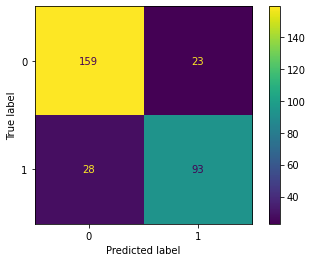

In [1040]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe,x_test,y_test)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

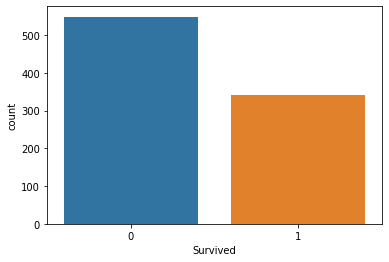

In [1041]:
import seaborn as sns
sns.countplot(y)

In [1042]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
over = RandomOverSampler()
o_x,o_y = over.fit_resample(x,y)
o_y.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [1043]:
from imblearn.pipeline import make_pipeline
s = SMOTE()
s_pipe = make_pipeline(trans,s,model)
s_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 4, 3, 6, 7, 8]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=50),
                                                  [2])])),
                ('smote', SMOTE()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [1044]:
s_pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 4, 3, 6, 7, 8]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=50),
                                                  [2])])),
                ('smote', SMOTE()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [1045]:
pred_s = s_pipe.predict(x_test)

In [1046]:
accuracy_score(pred_s,y_test)*100

80.85808580858085

In [1047]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
model_2 = LogisticRegression(solver = 'liblinear')
pipe_2 = make_pipeline(trans,model_2)

In [1048]:
model_2  

LogisticRegression(solver='liblinear')

In [1049]:
pipe_2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 4, 3, 6, 7, 8]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=50),
                                                  [2])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [1050]:
pipe_2.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 4, 3, 6, 7, 8]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=50),
                                                  [2])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [1051]:
pred_2 = pipe_2.predict(x_test)


In [1052]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_2,y_test)*100

80.19801980198021

In [1053]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [1054]:
test_data = test_data.drop(columns = ['PassengerId','Name','Ticket','Cabin'])


In [1055]:
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [1056]:
test_data.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [1057]:
test_data['Sex'] = test_data['Sex'].map({'female':1,'male':0}).astype(int)
test_data['Embarked_S'] = test_data['Embarked'].replace('Q',0).replace('C',0).replace('S',1)
test_data['Embarked_Q'] = test_data['Embarked'].replace('C',0).replace('S',0).replace('Q',1)
test_data['Embarked_C'] = test_data['Embarked'].replace('S',0).replace('Q',0).replace('C',1)

In [1058]:
test_data.Age = test_data.Age.fillna(0)
test_data.Fare = test_data.Fare.fillna(0)

In [1059]:
test_data.drop(columns = ['Embarked'],inplace = True)

In [1060]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_Q,Embarked_C
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,1,0,0
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,1,0,0
4,3,1,22.0,1,1,12.2875,1,0,0
...,...,...,...,...,...,...,...,...,...
413,3,0,0.0,0,0,8.0500,1,0,0
414,1,1,39.0,0,0,108.9000,0,0,1
415,3,0,38.5,0,0,7.2500,1,0,0
416,3,0,0.0,0,0,8.0500,1,0,0


In [1061]:
test_data.dtypes

Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_S      int64
Embarked_Q      int64
Embarked_C      int64
dtype: object

In [1062]:
num_cols = [0,1,3,4,6,7,8]
Kbin_cols = [5]
bina_cols = [2]

In [1063]:
from sklearn.preprocessing import StandardScaler,KBinsDiscretizer,Binarizer
from sklearn.compose import make_column_transformer
from sklearn import set_config
trans  = make_column_transformer((StandardScaler(),num_cols),
                                (KBinsDiscretizer(),Kbin_cols),
                                 (Binarizer(threshold = 50),bina_cols),
                                  remainder = 'passthrough')
set_config(display = 'diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 [0, 1, 3, 4, 6, 7, 8]),
                                ('kbinsdiscretizer', KBinsDiscretizer(), [5]),
                                ('binarizer', Binarizer(threshold=50), [2])])

In [1080]:
#submission_data = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')


In [1081]:
#submission_data.drop(columns = ['PassengerId'],inplace = True)

In [1082]:
#submission_data

In [1083]:
#Here model_2 is LogesticRegression
#model_2.fit(x_train,y_train)

In [1084]:
#from sklearn.metrics import accuracy_score
#model_2.score(x_train,y_train)*100


In [1085]:
pred_model_2 = pipe_2.predict(test_data)
pred_model_2

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [1086]:
#accuracy_score(pred_model_2,submission_data)*100

In [1087]:
#print("Train Accuracy: {:.5f}%".format(model_2.score(x_train,y_train)*100))
#print('Test Accuracy: {:.2f}%'.format(accuracy_score(pred_model_2,submission_data)*100))


In [1091]:
submit_data = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')


In [1094]:
submit_data['Survived'] = pred_model_2
submit_data.to_csv('submission.csv',index=False)

In [1095]:
submission_data.Survived.value_counts()

1    273
0    145
Name: Survived, dtype: int64